### H_tree check

In [1]:
from src.Planners.H_MCTS import H_MCTS
from src.Planners.H_MCTS import H_Node

import math
import pandas as pd

In [2]:
l1_rows = 8
l1_cols = 8
l1_width = 2
l1_height = 2
# highest_level = 2
num_barrier = 20
random_seed= 25

explorationConstant = 1 / math.sqrt(2)
grid_setting = (l1_rows, l1_cols, l1_width, l1_height)

iter_Limit = 10000

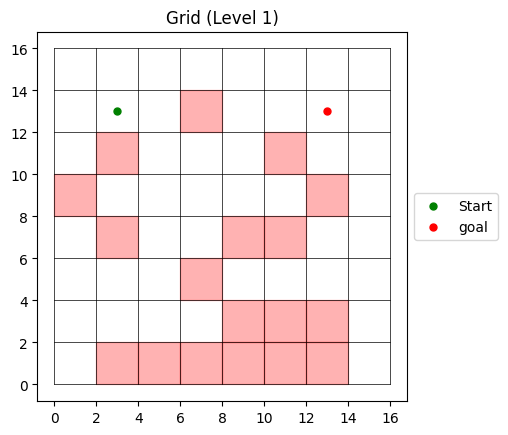

10 with [(1, 1, 6), (1, 2, 6), (1, 2, 7), (1, 3, 7), (1, 4, 7), (1, 5, 7), (1, 6, 7), (1, 6, 6)] H-MCTS
10 with [(1, 1, 6), (1, 2, 6), (1, 2, 5), (1, 3, 5), (1, 4, 5), (1, 4, 6), (1, 5, 6), (1, 6, 6)] plain-MCTS
-----------------------------------------------------------------------------------------


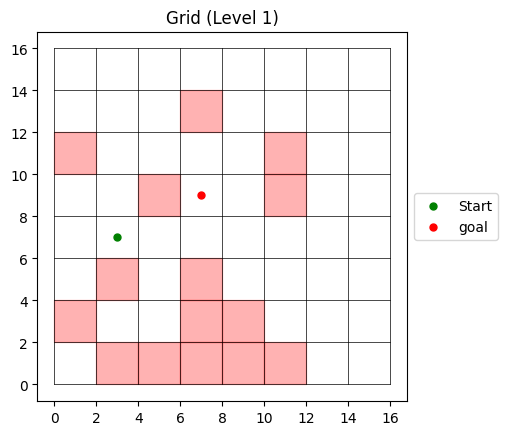

11 with [(1, 1, 3), (1, 2, 3), (1, 3, 3), (1, 3, 4)] H-MCTS
11 with [(1, 1, 3), (1, 2, 3), (1, 3, 3), (1, 3, 4)] plain-MCTS
-----------------------------------------------------------------------------------------


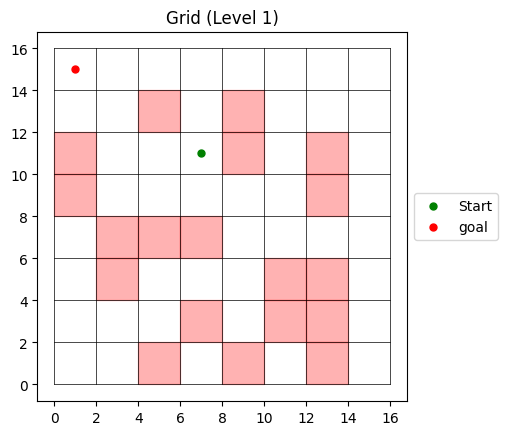

12 with [(1, 3, 5), (1, 2, 5), (1, 1, 5), (1, 1, 6), (1, 0, 6), (1, 0, 7)] H-MCTS
12 with [(1, 3, 5), (1, 3, 6), (1, 3, 7), (1, 2, 7), (1, 1, 7), (1, 0, 7)] plain-MCTS
-----------------------------------------------------------------------------------------


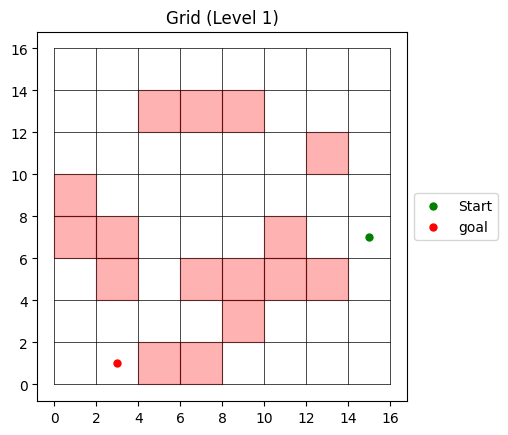

13 with [(1, 7, 3), (1, 6, 3), (1, 6, 4), (1, 5, 4), (1, 4, 4), (1, 4, 3), (1, 3, 3), (1, 2, 3), (1, 2, 2), (1, 2, 1), (1, 1, 1), (1, 1, 0)] H-MCTS
13 with [(1, 7, 3), (1, 7, 4), (1, 6, 4), (1, 5, 4), (1, 4, 4), (1, 3, 4), (1, 4, 4), (1, 3, 4), (1, 3, 5)] plain-MCTS
-----------------------------------------------------------------------------------------


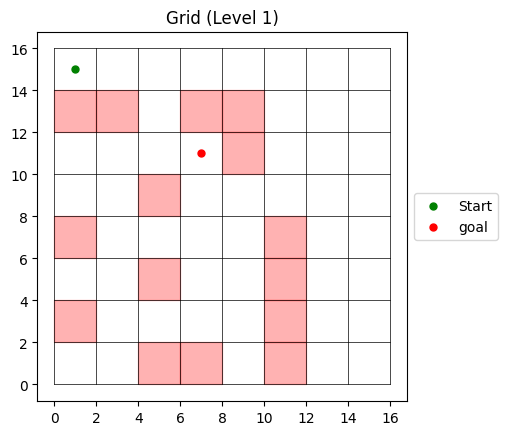

14 with [(1, 0, 7), (1, 1, 7), (1, 2, 7), (1, 2, 6), (1, 2, 5), (1, 3, 5)] H-MCTS
14 with [(1, 0, 7), (1, 1, 7), (1, 2, 7), (1, 2, 6), (1, 2, 5), (1, 3, 5)] plain-MCTS
-----------------------------------------------------------------------------------------


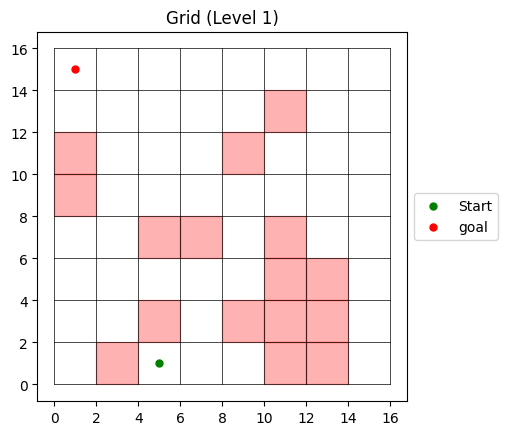

15 with [(1, 2, 0), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 2, 2), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 1, 6), (1, 0, 6), (1, 0, 7)] H-MCTS
15 with [(1, 2, 0), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 2, 2), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 1, 6), (1, 0, 6), (1, 0, 7)] plain-MCTS
-----------------------------------------------------------------------------------------


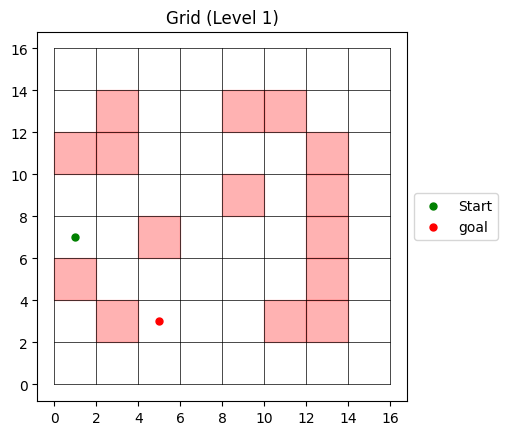

17 with [(1, 0, 3), (1, 1, 3), (1, 1, 2), (1, 2, 2), (1, 2, 1)] H-MCTS
17 with [(1, 0, 3), (1, 1, 3), (1, 1, 2), (1, 2, 2), (1, 2, 1)] plain-MCTS
-----------------------------------------------------------------------------------------


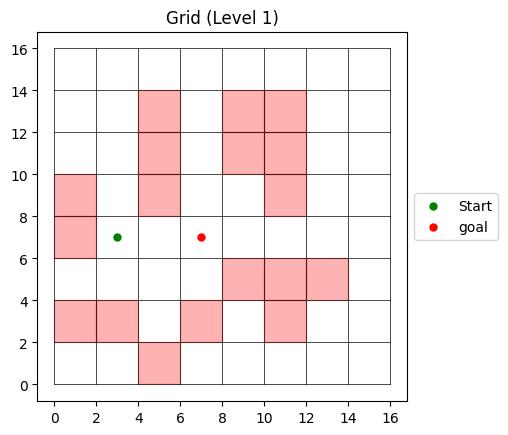

19 with [(1, 1, 3), (1, 2, 3), (1, 3, 3)] H-MCTS
19 with [(1, 1, 3), (1, 2, 3), (1, 3, 3)] plain-MCTS
-----------------------------------------------------------------------------------------


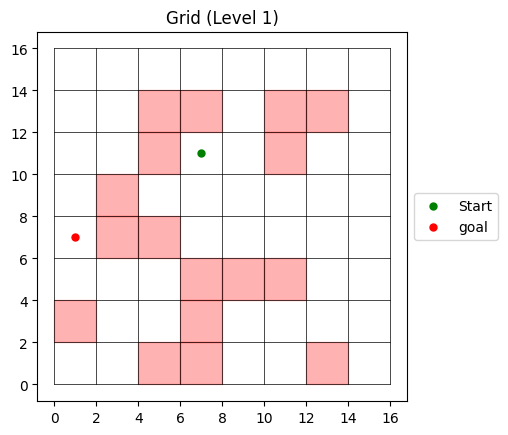

20 with [(1, 3, 5), (1, 3, 4), (1, 4, 4), (1, 3, 4), (1, 3, 3), (1, 3, 4), (1, 4, 4), (1, 3, 4), (1, 3, 3), (1, 3, 4)] H-MCTS
20 with [(1, 3, 5), (1, 3, 4), (1, 4, 4), (1, 5, 4), (1, 6, 4), (1, 6, 3), (1, 6, 4), (1, 7, 4), (1, 6, 4)] plain-MCTS
-----------------------------------------------------------------------------------------


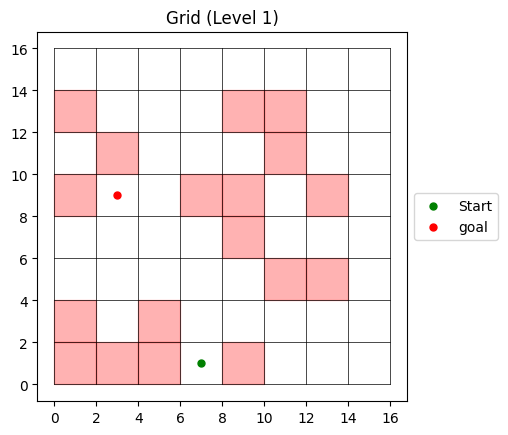

21 with [(1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 2, 2), (1, 2, 3), (1, 1, 3), (1, 1, 4)] H-MCTS
21 with [(1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 2, 2), (1, 2, 3), (1, 1, 3), (1, 1, 4)] plain-MCTS
-----------------------------------------------------------------------------------------


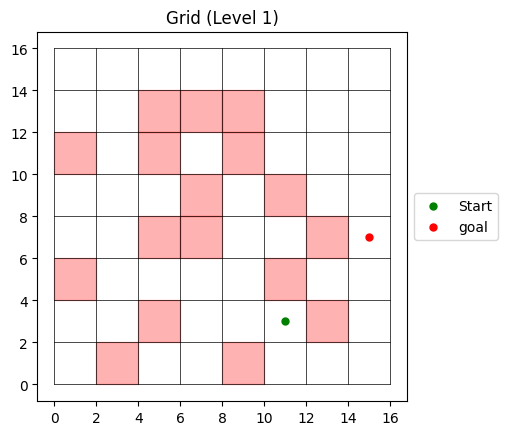

22 with [(1, 5, 1), (1, 5, 0), (1, 6, 0), (1, 7, 0), (1, 7, 1), (1, 7, 2), (1, 7, 3)] H-MCTS
22 with [(1, 5, 1), (1, 5, 0), (1, 6, 0), (1, 7, 0), (1, 7, 1), (1, 7, 2), (1, 7, 3)] plain-MCTS
-----------------------------------------------------------------------------------------


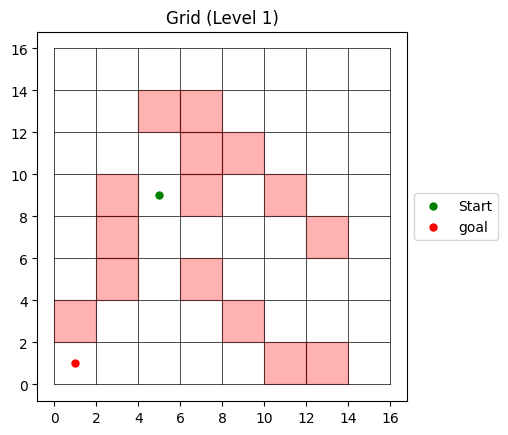

23 with [(1, 2, 4), (1, 2, 3), (1, 2, 2), (1, 2, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0)] H-MCTS
23 with [(1, 2, 4), (1, 2, 3), (1, 2, 2), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0)] plain-MCTS
-----------------------------------------------------------------------------------------


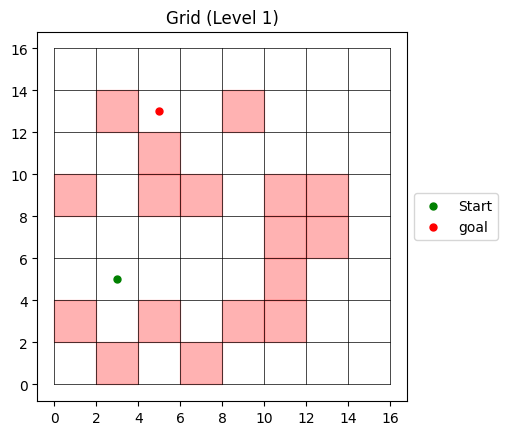

25 with [(1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 0, 5), (1, 0, 6), (1, 0, 7), (1, 1, 7), (1, 2, 7), (1, 2, 6)] H-MCTS
25 with [(1, 1, 2), (1, 1, 3), (1, 2, 3), (1, 1, 3), (1, 2, 3), (1, 1, 3), (1, 1, 2), (1, 1, 3), (1, 0, 3)] plain-MCTS
-----------------------------------------------------------------------------------------


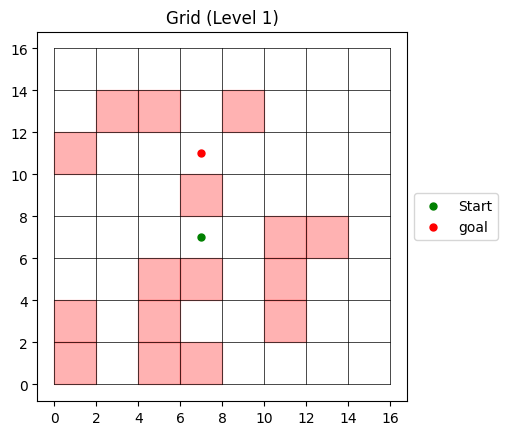

27 with [(1, 3, 3), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 5)] H-MCTS
27 with [(1, 3, 3), (1, 4, 3), (1, 4, 4), (1, 4, 5), (1, 3, 5)] plain-MCTS
-----------------------------------------------------------------------------------------


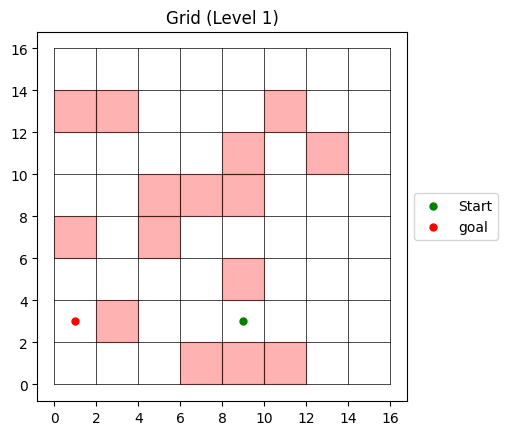

28 with [(1, 4, 1), (1, 3, 1), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1)] H-MCTS
28 with [(1, 4, 1), (1, 3, 1), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1)] plain-MCTS
-----------------------------------------------------------------------------------------


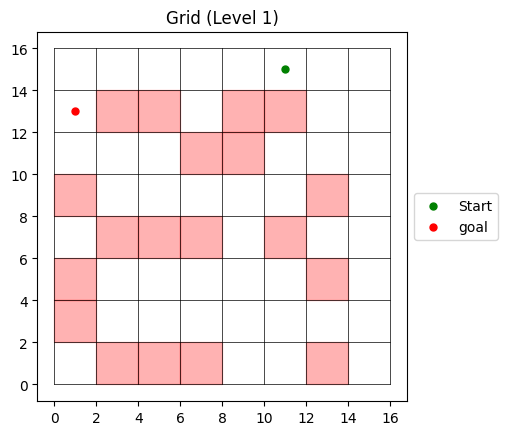

29 with [(1, 5, 7), (1, 4, 7), (1, 3, 7), (1, 2, 7), (1, 1, 7), (1, 0, 7), (1, 0, 6)] H-MCTS
29 with [(1, 5, 7), (1, 4, 7), (1, 3, 7), (1, 2, 7), (1, 1, 7), (1, 0, 7), (1, 0, 6)] plain-MCTS
-----------------------------------------------------------------------------------------


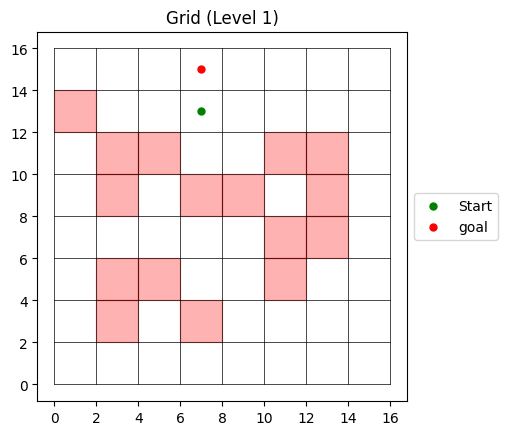

30 with [(1, 3, 6), (1, 3, 7)] H-MCTS
30 with [(1, 3, 6), (1, 3, 7)] plain-MCTS
-----------------------------------------------------------------------------------------


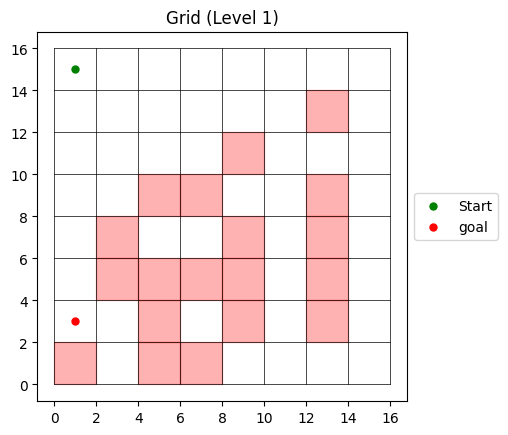

31 with [(1, 0, 7), (1, 0, 6), (1, 0, 5), (1, 0, 4), (1, 0, 3), (1, 0, 2), (1, 0, 1)] H-MCTS
31 with [(1, 0, 7), (1, 0, 6), (1, 0, 5), (1, 0, 4), (1, 0, 3), (1, 0, 2), (1, 0, 1)] plain-MCTS
-----------------------------------------------------------------------------------------


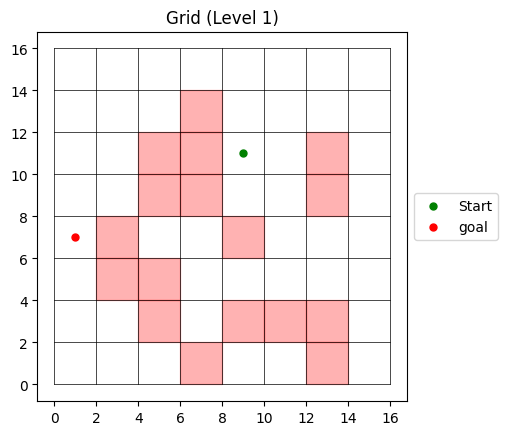

32 with [(1, 4, 5), (1, 5, 5), (1, 5, 6), (1, 5, 5), (1, 5, 4), (1, 5, 3), (1, 6, 3), (1, 7, 3), (1, 7, 4), (1, 7, 5), (1, 7, 6), (1, 7, 7)] H-MCTS
32 with [(1, 4, 5), (1, 4, 6), (1, 5, 6), (1, 4, 6), (1, 5, 6), (1, 5, 7), (1, 5, 6), (1, 5, 7), (1, 4, 7)] plain-MCTS
-----------------------------------------------------------------------------------------


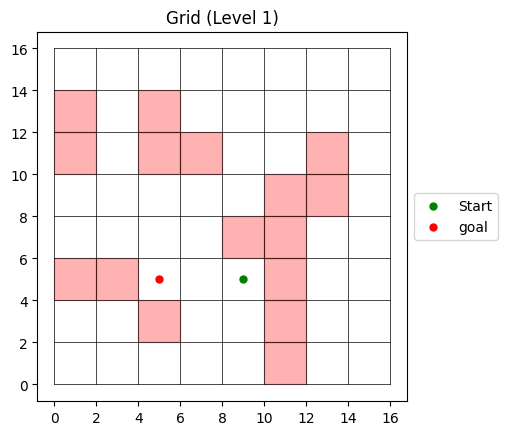

34 with [(1, 4, 2), (1, 3, 2), (1, 2, 2)] H-MCTS
34 with [(1, 4, 2), (1, 3, 2), (1, 2, 2)] plain-MCTS
-----------------------------------------------------------------------------------------


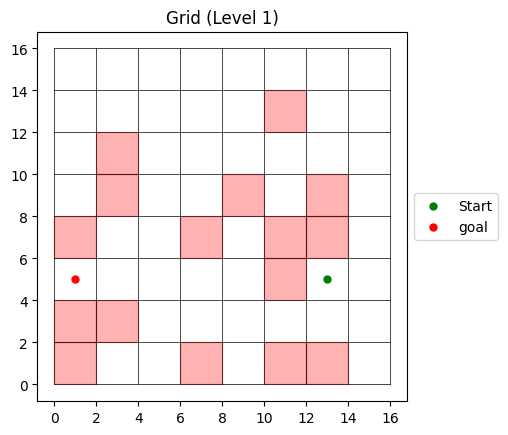

35 with [(1, 6, 2), (1, 6, 1), (1, 5, 1), (1, 4, 1), (1, 4, 2), (1, 3, 2), (1, 2, 2), (1, 1, 2), (1, 0, 2)] H-MCTS
35 with [(1, 6, 2), (1, 6, 1), (1, 5, 1), (1, 4, 1), (1, 4, 2), (1, 3, 2), (1, 2, 2), (1, 1, 2), (1, 0, 2)] plain-MCTS
-----------------------------------------------------------------------------------------


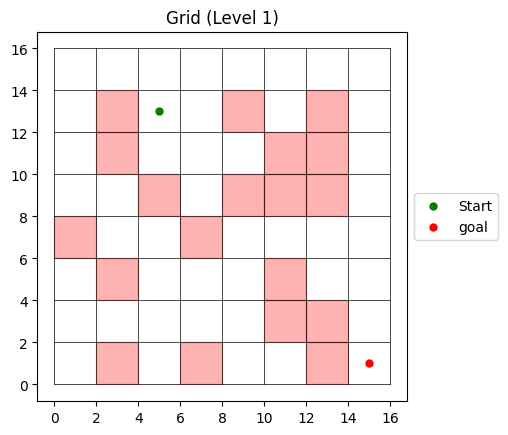

36 with [(1, 2, 6), (1, 3, 6), (1, 3, 7), (1, 4, 7), (1, 3, 7), (1, 2, 7), (1, 1, 7), (1, 2, 7), (1, 2, 6), (1, 2, 7), (1, 1, 7)] H-MCTS
36 with [(1, 2, 6), (1, 3, 6), (1, 2, 6), (1, 3, 6), (1, 2, 6), (1, 3, 6), (1, 3, 7), (1, 2, 7), (1, 1, 7), (1, 2, 7)] plain-MCTS
-----------------------------------------------------------------------------------------


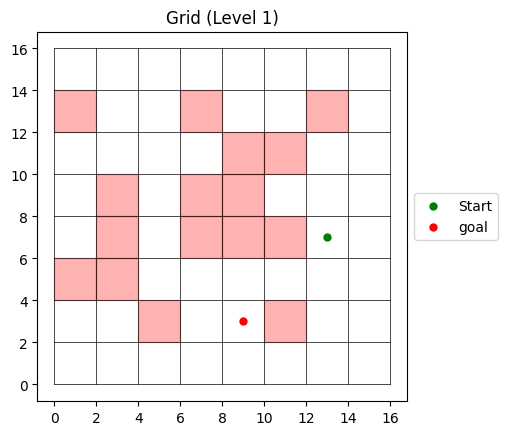

38 with [(1, 6, 3), (1, 6, 2), (1, 5, 2), (1, 4, 2), (1, 4, 1)] H-MCTS
38 with [(1, 6, 3), (1, 6, 2), (1, 5, 2), (1, 4, 2), (1, 4, 1)] plain-MCTS
-----------------------------------------------------------------------------------------


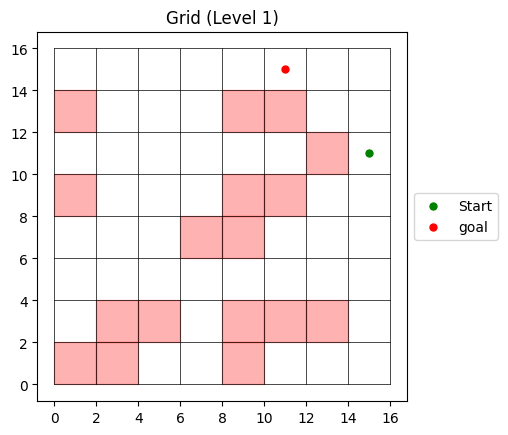

39 with [(1, 7, 5), (1, 7, 6), (1, 7, 7), (1, 6, 7), (1, 5, 7)] H-MCTS
39 with [(1, 7, 5), (1, 7, 6), (1, 6, 6), (1, 6, 7), (1, 5, 7)] plain-MCTS
-----------------------------------------------------------------------------------------


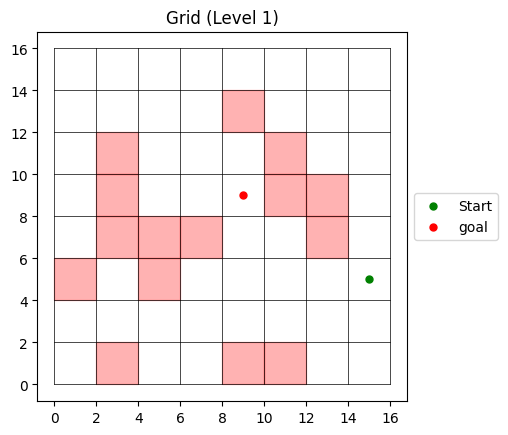

40 with [(1, 7, 2), (1, 6, 2), (1, 5, 2), (1, 5, 3), (1, 4, 3), (1, 4, 4)] H-MCTS
40 with [(1, 7, 2), (1, 6, 2), (1, 5, 2), (1, 4, 2), (1, 4, 3), (1, 4, 4)] plain-MCTS
-----------------------------------------------------------------------------------------


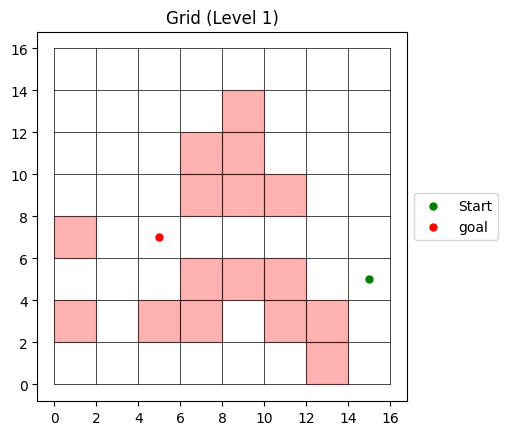

41 with [(1, 7, 2), (1, 7, 3), (1, 6, 3), (1, 5, 3), (1, 4, 3), (1, 3, 3), (1, 2, 3)] H-MCTS
41 with [(1, 7, 2), (1, 7, 3), (1, 6, 3), (1, 5, 3), (1, 4, 3), (1, 3, 3), (1, 2, 3)] plain-MCTS
-----------------------------------------------------------------------------------------


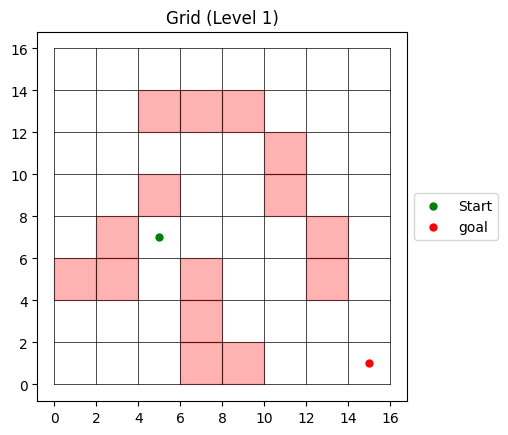

42 with [(1, 2, 3), (1, 3, 3), (1, 4, 3), (1, 4, 2), (1, 4, 1), (1, 5, 1), (1, 6, 1), (1, 6, 0), (1, 7, 0)] H-MCTS
42 with [(1, 2, 3), (1, 3, 3), (1, 4, 3), (1, 4, 2), (1, 5, 2), (1, 5, 1), (1, 5, 0), (1, 6, 0), (1, 7, 0)] plain-MCTS
-----------------------------------------------------------------------------------------


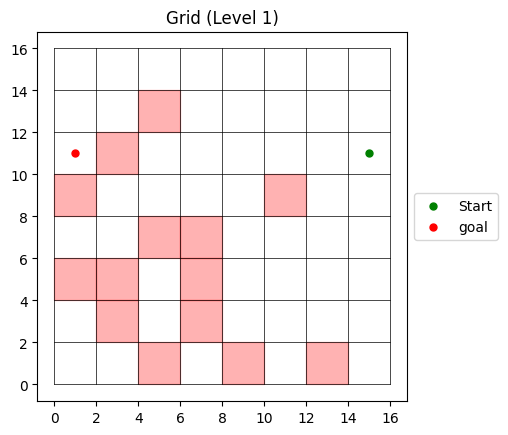

43 with [(1, 7, 5), (1, 6, 5), (1, 6, 6), (1, 5, 6), (1, 4, 6), (1, 4, 5), (1, 3, 5), (1, 3, 6), (1, 4, 6), (1, 4, 5), (1, 4, 6)] H-MCTS
43 with [(1, 7, 5), (1, 6, 5), (1, 6, 6), (1, 5, 6), (1, 4, 6), (1, 5, 6), (1, 6, 6), (1, 5, 6)] plain-MCTS
-----------------------------------------------------------------------------------------


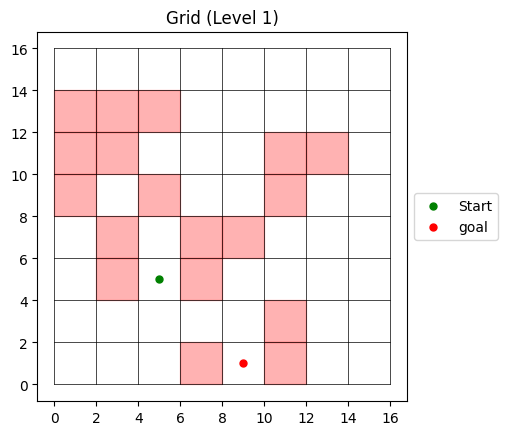

44 with [(1, 2, 2), (1, 2, 1), (1, 3, 1), (1, 4, 1), (1, 4, 0)] H-MCTS
44 with [(1, 2, 2), (1, 2, 1), (1, 3, 1), (1, 4, 1), (1, 4, 0)] plain-MCTS
-----------------------------------------------------------------------------------------


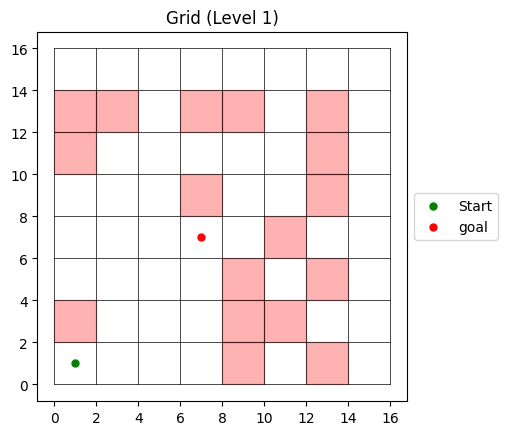

45 with [(1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3)] H-MCTS
45 with [(1, 0, 0), (1, 1, 0), (1, 1, 1), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 3, 3)] plain-MCTS
-----------------------------------------------------------------------------------------


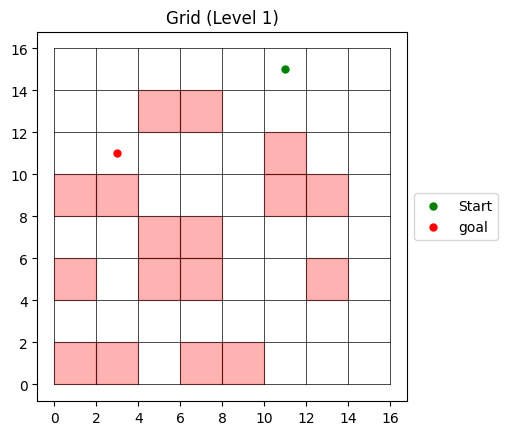

46 with [(1, 5, 7), (1, 4, 7), (1, 4, 6), (1, 4, 5), (1, 3, 5), (1, 2, 5), (1, 1, 5)] H-MCTS
46 with [(1, 5, 7), (1, 4, 7), (1, 3, 7), (1, 2, 7), (1, 1, 7), (1, 1, 6), (1, 1, 5)] plain-MCTS
-----------------------------------------------------------------------------------------


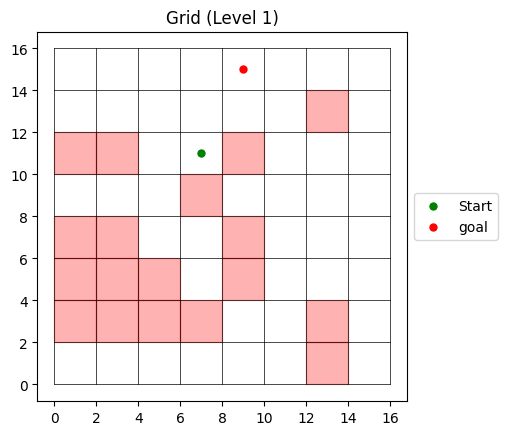

47 with [(1, 3, 5), (1, 3, 6), (1, 3, 7), (1, 4, 7)] H-MCTS
47 with [(1, 3, 5), (1, 3, 6), (1, 3, 7), (1, 4, 7)] plain-MCTS
-----------------------------------------------------------------------------------------


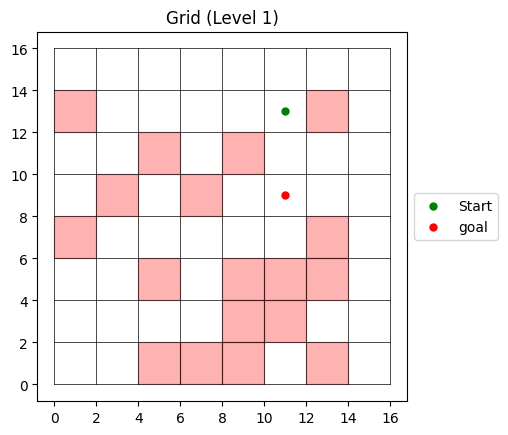

48 with [(1, 5, 6), (1, 5, 5), (1, 5, 4)] H-MCTS
48 with [(1, 5, 6), (1, 5, 5), (1, 5, 4)] plain-MCTS
-----------------------------------------------------------------------------------------


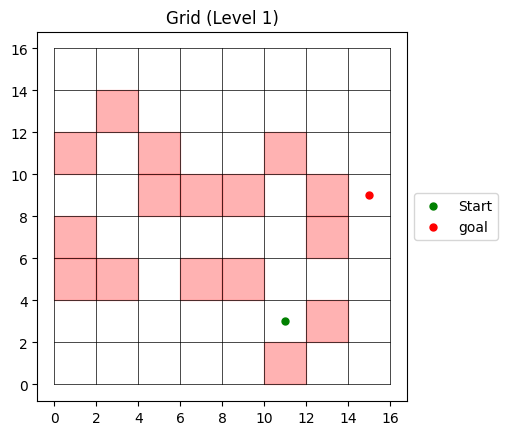

49 with [(1, 5, 1), (1, 5, 2), (1, 6, 2), (1, 7, 2), (1, 7, 3), (1, 7, 4)] H-MCTS
49 with [(1, 5, 1), (1, 5, 2), (1, 6, 2), (1, 7, 2), (1, 7, 3), (1, 7, 4)] plain-MCTS
-----------------------------------------------------------------------------------------


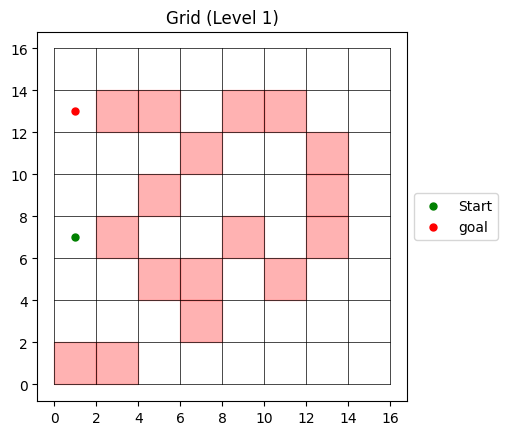

50 with [(1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 0, 6)] H-MCTS
50 with [(1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 0, 6)] plain-MCTS
-----------------------------------------------------------------------------------------


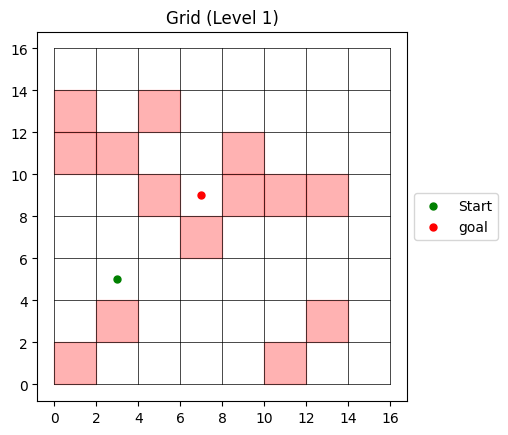

51 with [(1, 1, 2), (1, 1, 3), (1, 2, 3), (1, 1, 3), (1, 1, 4), (1, 1, 3), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 2), (1, 0, 3)] H-MCTS
51 with [(1, 1, 2), (1, 2, 2), (1, 3, 2), (1, 4, 2), (1, 5, 2), (1, 4, 2), (1, 5, 2), (1, 4, 2), (1, 3, 2)] plain-MCTS
-----------------------------------------------------------------------------------------


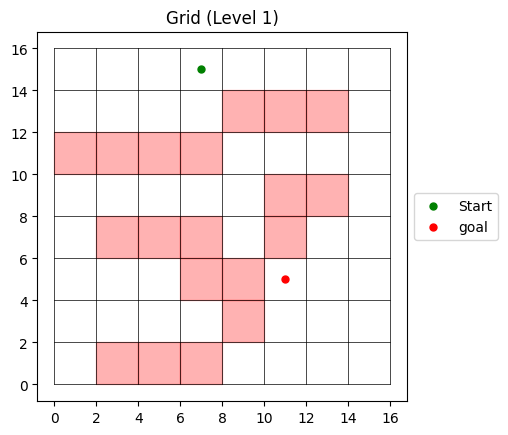

52 with [(1, 3, 7), (1, 2, 7), (1, 1, 7), (1, 2, 7), (1, 3, 7), (1, 4, 7), (1, 3, 7), (1, 2, 7), (1, 1, 7), (1, 0, 7), (1, 1, 7)] H-MCTS
52 with [(1, 3, 7), (1, 2, 7), (1, 2, 6), (1, 2, 7), (1, 2, 6), (1, 2, 7), (1, 2, 6), (1, 1, 6), (1, 0, 6), (1, 0, 7)] plain-MCTS
-----------------------------------------------------------------------------------------


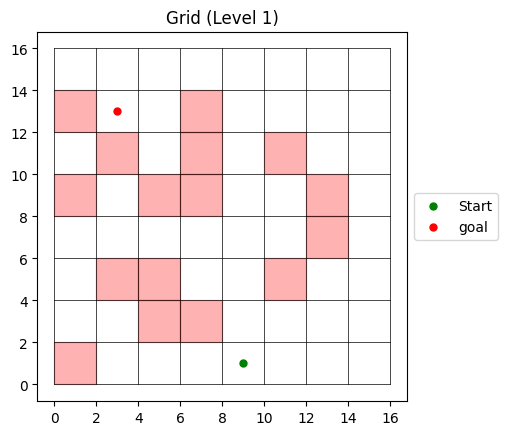

53 with [(1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 3, 3), (1, 2, 3), (1, 1, 3), (1, 1, 4), (1, 1, 3), (1, 2, 3), (1, 3, 3), (1, 4, 3)] H-MCTS
53 with [(1, 4, 0), (1, 5, 0), (1, 5, 1), (1, 6, 1), (1, 5, 1), (1, 6, 1), (1, 7, 1), (1, 7, 2), (1, 7, 3)] plain-MCTS
-----------------------------------------------------------------------------------------


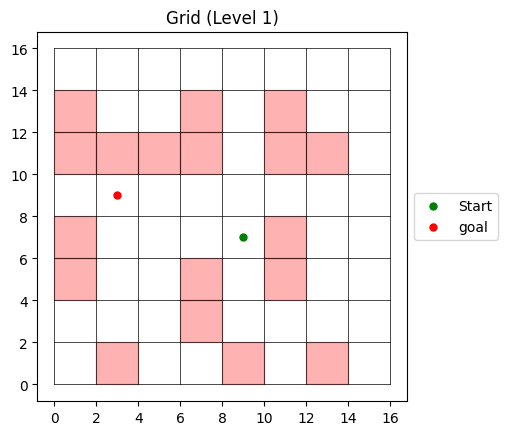

55 with [(1, 4, 3), (1, 4, 4), (1, 3, 4), (1, 2, 4), (1, 1, 4)] H-MCTS
55 with [(1, 4, 3), (1, 3, 3), (1, 3, 4), (1, 2, 4), (1, 1, 4)] plain-MCTS
-----------------------------------------------------------------------------------------


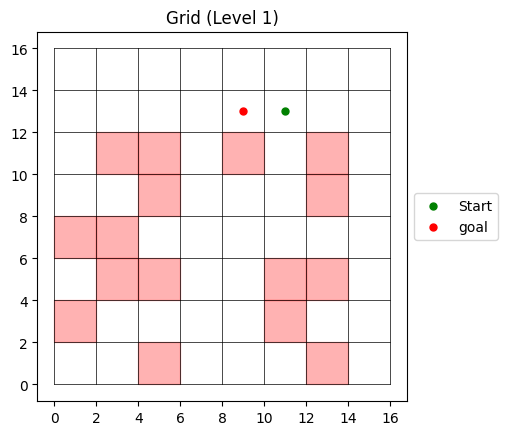

57 with [(1, 5, 6), (1, 4, 6)] H-MCTS
57 with [(1, 5, 6), (1, 4, 6)] plain-MCTS
-----------------------------------------------------------------------------------------


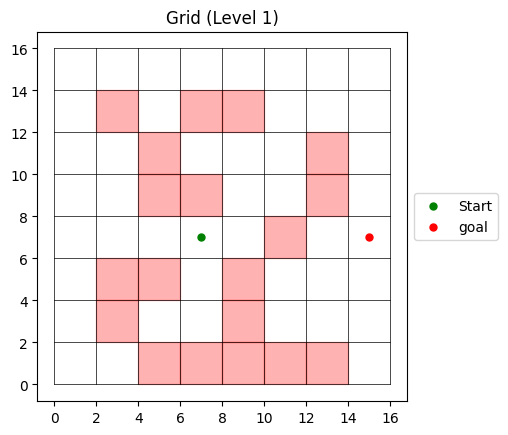

58 with [(1, 3, 3), (1, 4, 3), (1, 3, 3), (1, 2, 3), (1, 1, 3), (1, 1, 4), (1, 0, 4), (1, 0, 3), (1, 0, 4), (1, 1, 4), (1, 1, 3)] H-MCTS
58 with [(1, 3, 3), (1, 4, 3), (1, 4, 4), (1, 5, 4), (1, 5, 5), (1, 5, 6), (1, 6, 6), (1, 7, 6), (1, 7, 5), (1, 7, 4), (1, 7, 3)] plain-MCTS
-----------------------------------------------------------------------------------------


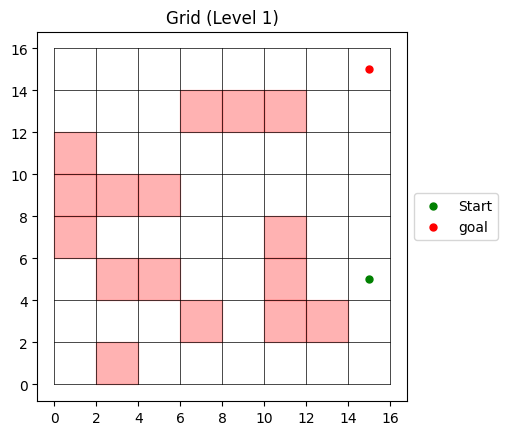

59 with [(1, 7, 2), (1, 7, 3), (1, 7, 4), (1, 7, 5), (1, 7, 6), (1, 7, 7)] H-MCTS
59 with [(1, 7, 2), (1, 7, 3), (1, 7, 4), (1, 7, 5), (1, 7, 6), (1, 7, 7)] plain-MCTS
-----------------------------------------------------------------------------------------


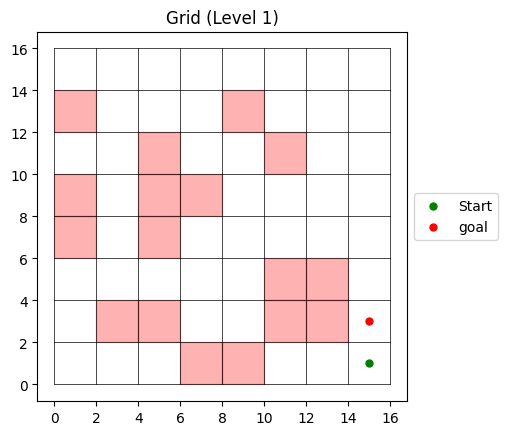

60 with [(1, 7, 0), (1, 7, 1)] H-MCTS
60 with [(1, 7, 0), (1, 7, 1)] plain-MCTS
-----------------------------------------------------------------------------------------


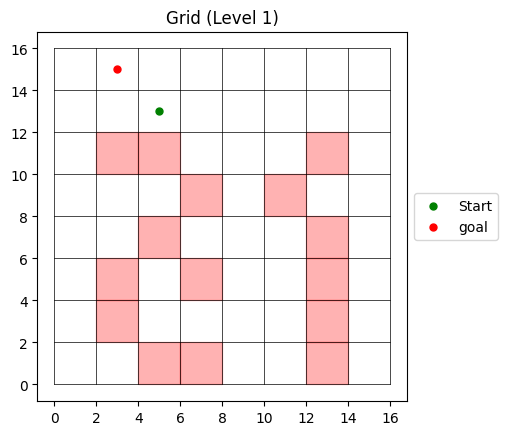

61 with [(1, 2, 6), (1, 1, 6), (1, 1, 7)] H-MCTS
61 with [(1, 2, 6), (1, 2, 7), (1, 1, 7)] plain-MCTS
-----------------------------------------------------------------------------------------


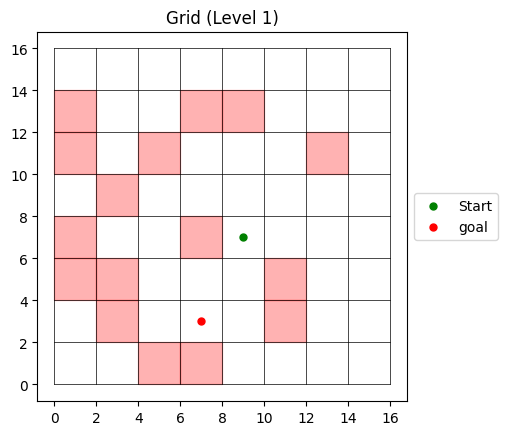

62 with [(1, 4, 3), (1, 4, 2), (1, 4, 1), (1, 3, 1)] H-MCTS
62 with [(1, 4, 3), (1, 4, 2), (1, 3, 2), (1, 3, 1)] plain-MCTS
-----------------------------------------------------------------------------------------


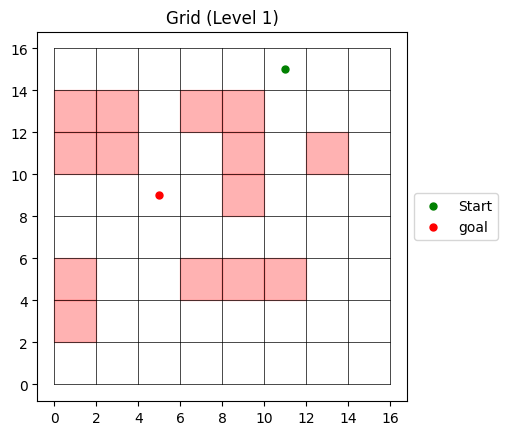

63 with [(1, 5, 7), (1, 4, 7), (1, 3, 7), (1, 2, 7), (1, 2, 6), (1, 2, 5), (1, 2, 4)] H-MCTS
63 with [(1, 5, 7), (1, 4, 7), (1, 3, 7), (1, 2, 7), (1, 2, 6), (1, 2, 5), (1, 2, 4)] plain-MCTS
-----------------------------------------------------------------------------------------


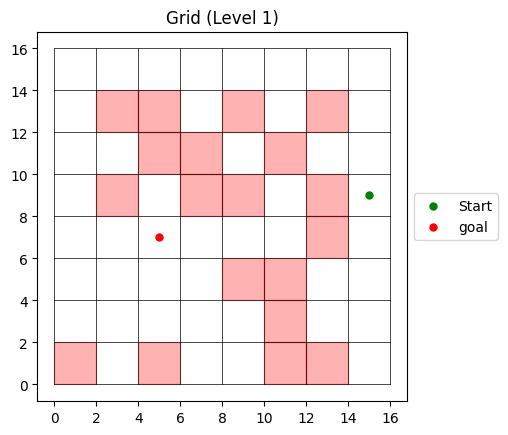

64 with [(1, 7, 4), (1, 7, 5), (1, 7, 6), (1, 7, 5), (1, 7, 4), (1, 7, 3), (1, 7, 2), (1, 7, 1), (1, 7, 2), (1, 7, 1), (1, 7, 2), (1, 6, 2)] H-MCTS
64 with [(1, 7, 4), (1, 7, 3), (1, 7, 2), (1, 7, 1), (1, 7, 2), (1, 7, 1), (1, 7, 2), (1, 7, 1), (1, 7, 2), (1, 7, 1), (1, 7, 2)] plain-MCTS
-----------------------------------------------------------------------------------------


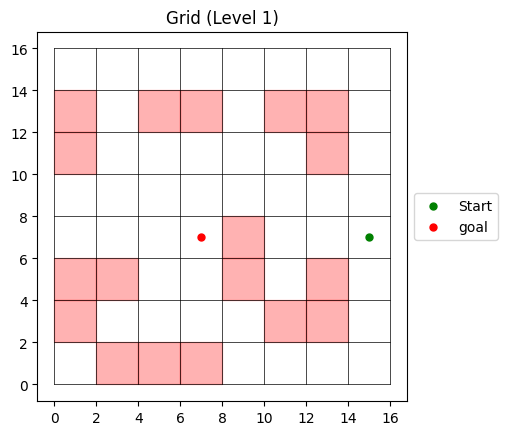

65 with [(1, 7, 3), (1, 6, 3), (1, 5, 3), (1, 5, 4), (1, 4, 4), (1, 3, 4), (1, 3, 3)] H-MCTS
65 with [(1, 7, 3), (1, 6, 3), (1, 6, 4), (1, 5, 4), (1, 4, 4), (1, 3, 4), (1, 3, 3)] plain-MCTS
-----------------------------------------------------------------------------------------


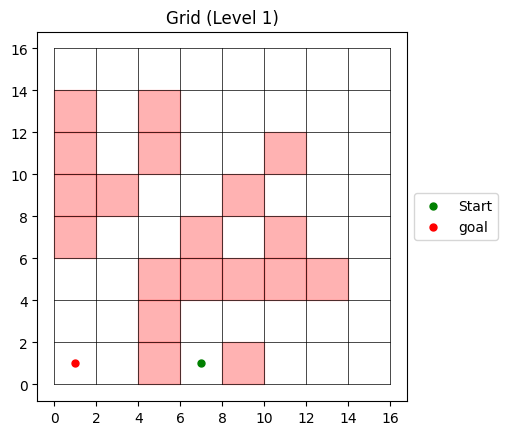

66 with [(1, 3, 0), (1, 3, 1), (1, 4, 1), (1, 5, 1), (1, 6, 1), (1, 7, 1), (1, 6, 1), (1, 7, 1), (1, 6, 1), (1, 5, 1), (1, 6, 1), (1, 7, 1), (1, 7, 0)] H-MCTS
66 with [(1, 3, 0), (1, 3, 1), (1, 4, 1), (1, 5, 1), (1, 6, 1), (1, 7, 1), (1, 6, 1), (1, 7, 1), (1, 6, 1), (1, 6, 0), (1, 6, 1), (1, 7, 1), (1, 7, 0)] plain-MCTS
-----------------------------------------------------------------------------------------


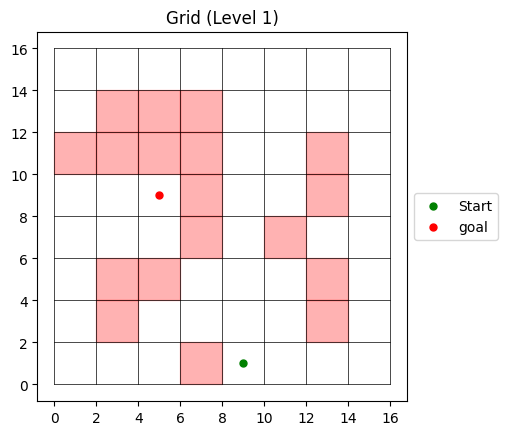

67 with [(1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 3, 2), (1, 3, 1), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (1, 4, 5), (1, 5, 5)] H-MCTS
67 with [(1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 4, 1), (1, 4, 2), (1, 4, 1), (1, 4, 2), (1, 4, 1), (1, 3, 1)] plain-MCTS
-----------------------------------------------------------------------------------------


In [18]:
r = 0
dead_list = [16, 18, 24, 26, 33, 37, 54, 56]

total_H = []
total_plain = []

for random_seed in range(10, 68):
    if random_seed in dead_list:
        continue
    else:
        
        highest_level = 2
        mcts = H_MCTS(grid_setting, iter_Limit=iter_Limit, highest_level=highest_level, explorationConstant=explorationConstant, num_barrier=num_barrier, random_seed=random_seed)
        mcts.Env.plot_grid(1)
        H_traj, H_reward = mcts.search()
        print(f'{random_seed} with {H_traj} H-MCTS')
        total_H.append(H_reward)
        
        highest_level = 1
        mcts = H_MCTS(grid_setting, iter_Limit=iter_Limit, highest_level=highest_level, explorationConstant=explorationConstant, num_barrier=num_barrier, random_seed=random_seed)
        plain_traj, plain_reward = mcts.search()
        print(f'{random_seed} with {plain_traj} plain-MCTS')
        total_plain.append(plain_reward)
        print('-----------------------------------------------------------------------------------------')

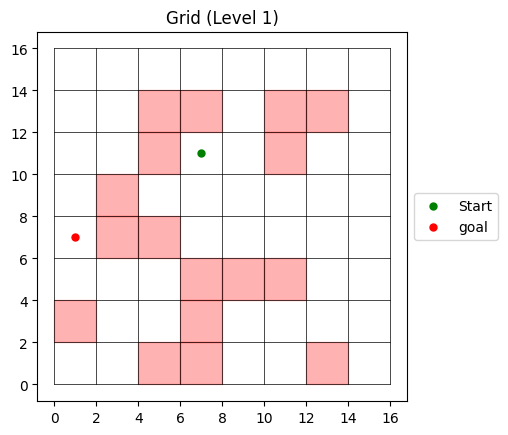

20 with [(1, 3, 5), (1, 3, 4), (1, 4, 4), (1, 4, 3), (1, 3, 3), (1, 4, 3), (1, 4, 4), (1, 5, 4), (1, 4, 4), (1, 3, 4), (1, 4, 4)] H-MCTS
20 with [(1, 3, 5), (1, 3, 4), (1, 4, 4), (1, 5, 4), (1, 6, 4), (1, 6, 3), (1, 6, 4), (1, 6, 3), (1, 6, 4), (1, 5, 4)] plain-MCTS
-----------------------------------------------------------------------------------------


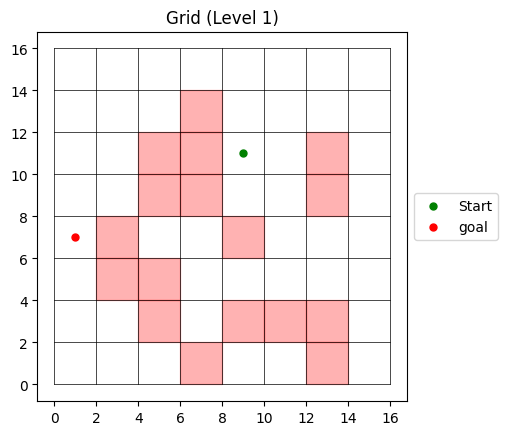

32 with [(1, 4, 5), (1, 4, 6), (1, 4, 7), (1, 3, 7), (1, 2, 7), (1, 2, 6), (1, 1, 6), (1, 1, 5), (1, 1, 4), (1, 0, 4), (1, 0, 3)] H-MCTS
32 with [(1, 4, 5), (1, 4, 6), (1, 4, 7), (1, 3, 7), (1, 2, 7), (1, 2, 6), (1, 1, 6), (1, 1, 5), (1, 1, 4), (1, 0, 4), (1, 0, 3)] plain-MCTS
-----------------------------------------------------------------------------------------


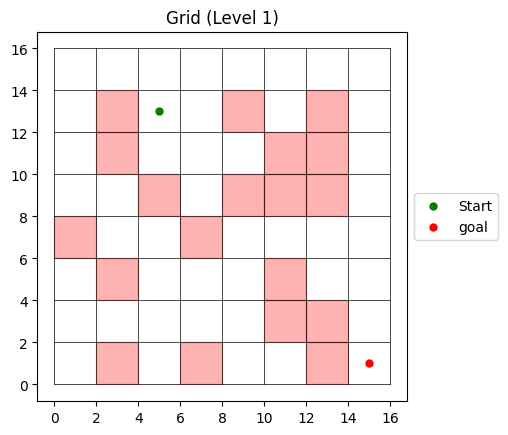

36 with [(1, 2, 6), (1, 3, 6), (1, 3, 5), (1, 3, 6), (1, 3, 7), (1, 4, 7), (1, 3, 7), (1, 2, 7), (1, 1, 7), (1, 2, 7), (1, 2, 6), (1, 3, 6)] H-MCTS
36 with [(1, 2, 6), (1, 3, 6), (1, 2, 6), (1, 3, 6), (1, 2, 6), (1, 3, 6), (1, 2, 6), (1, 3, 6), (1, 3, 7), (1, 4, 7), (1, 3, 7)] plain-MCTS
-----------------------------------------------------------------------------------------


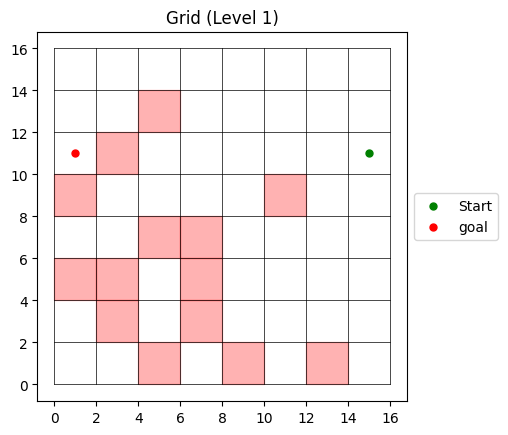

43 with [(1, 7, 5), (1, 6, 5), (1, 6, 6), (1, 5, 6), (1, 4, 6), (1, 3, 6), (1, 3, 7), (1, 2, 7), (1, 1, 7), (1, 1, 6), (1, 0, 6), (1, 0, 5)] H-MCTS
43 with [(1, 7, 5), (1, 6, 5), (1, 6, 6), (1, 5, 6), (1, 4, 6), (1, 5, 6), (1, 6, 6), (1, 6, 5), (1, 6, 6)] plain-MCTS
-----------------------------------------------------------------------------------------


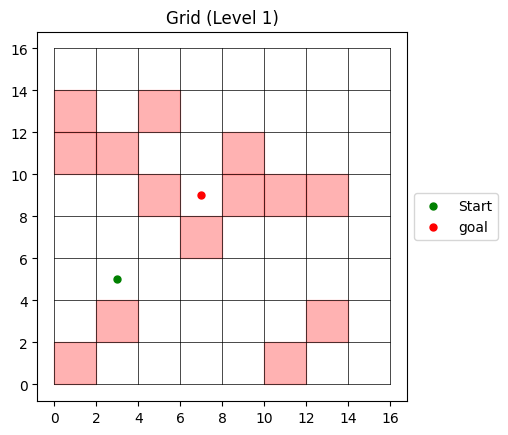

51 with [(1, 1, 2), (1, 1, 3), (1, 2, 3), (1, 1, 3), (1, 1, 4), (1, 1, 3), (1, 1, 2), (1, 2, 2), (1, 2, 1), (1, 2, 0), (1, 1, 0)] H-MCTS
51 with [(1, 1, 2), (1, 2, 2), (1, 3, 2), (1, 4, 2), (1, 4, 1), (1, 3, 1), (1, 4, 1), (1, 3, 1), (1, 3, 0), (1, 2, 0)] plain-MCTS
-----------------------------------------------------------------------------------------


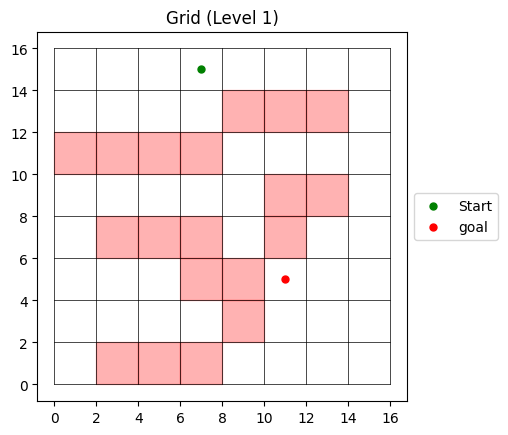

52 with [(1, 3, 7), (1, 2, 7), (1, 1, 7), (1, 2, 7), (1, 3, 7), (1, 2, 7), (1, 3, 7), (1, 4, 7), (1, 3, 7), (1, 2, 7), (1, 2, 6), (1, 1, 6)] H-MCTS
52 with [(1, 3, 7), (1, 2, 7), (1, 2, 6), (1, 2, 7), (1, 2, 6), (1, 2, 7), (1, 2, 6), (1, 2, 7), (1, 1, 7), (1, 2, 7), (1, 1, 7)] plain-MCTS
-----------------------------------------------------------------------------------------


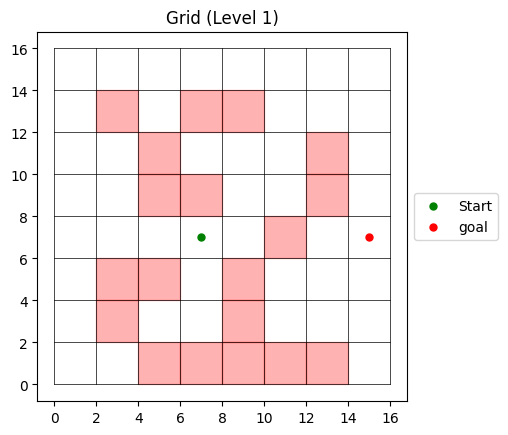

58 with [(1, 3, 3), (1, 4, 3), (1, 4, 4), (1, 5, 4), (1, 5, 5), (1, 5, 6), (1, 6, 6), (1, 7, 6), (1, 7, 5), (1, 7, 4), (1, 7, 3)] H-MCTS
58 with [(1, 3, 3), (1, 4, 3), (1, 4, 4), (1, 4, 5), (1, 5, 5), (1, 5, 6), (1, 6, 6), (1, 7, 6), (1, 7, 5), (1, 7, 4), (1, 7, 3)] plain-MCTS
-----------------------------------------------------------------------------------------


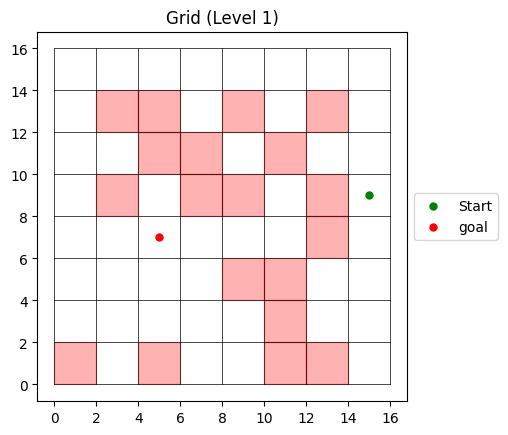

64 with [(1, 7, 4), (1, 7, 5), (1, 7, 6), (1, 7, 5), (1, 7, 4), (1, 7, 3), (1, 7, 2), (1, 7, 1), (1, 7, 2), (1, 7, 1), (1, 7, 2), (1, 7, 1), (1, 7, 0)] H-MCTS
64 with [(1, 7, 4), (1, 7, 3), (1, 7, 2), (1, 7, 1), (1, 7, 2), (1, 7, 1), (1, 7, 2), (1, 7, 1), (1, 7, 2), (1, 7, 1), (1, 7, 2), (1, 7, 3)] plain-MCTS
-----------------------------------------------------------------------------------------


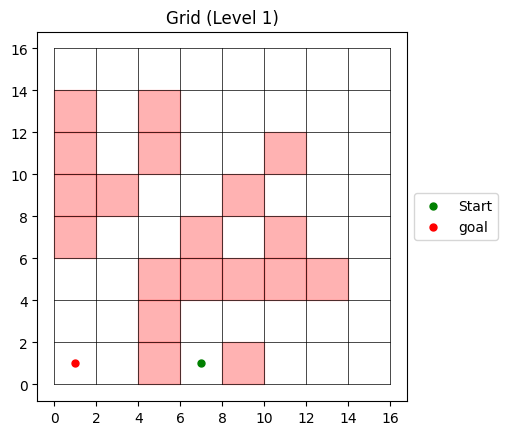

66 with [(1, 3, 0), (1, 3, 1), (1, 4, 1), (1, 5, 1), (1, 6, 1), (1, 7, 1), (1, 6, 1), (1, 7, 1), (1, 6, 1), (1, 7, 1), (1, 6, 1), (1, 5, 1), (1, 6, 1), (1, 7, 1)] H-MCTS
66 with [(1, 3, 0), (1, 3, 1), (1, 4, 1), (1, 5, 1), (1, 6, 1), (1, 7, 1), (1, 6, 1), (1, 7, 1), (1, 6, 1), (1, 7, 1), (1, 6, 1), (1, 6, 0), (1, 5, 0), (1, 6, 0)] plain-MCTS
-----------------------------------------------------------------------------------------


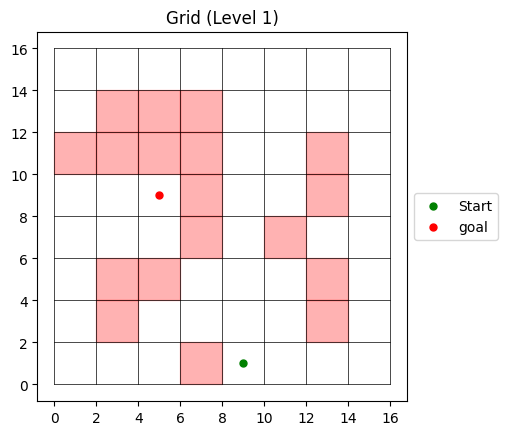

67 with [(1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 3, 2), (1, 3, 1), (1, 4, 1), (1, 4, 2), (1, 4, 1), (1, 4, 2), (1, 4, 1), (1, 3, 1)] H-MCTS
67 with [(1, 4, 0), (1, 4, 1), (1, 4, 2), (1, 4, 1), (1, 4, 2), (1, 4, 1), (1, 4, 2), (1, 4, 1), (1, 5, 1), (1, 5, 0)] plain-MCTS
-----------------------------------------------------------------------------------------


In [25]:
failed_cases = [20, 32, 36, 43, 51, 52, 58, 64, 66, 67]  # at 1 / sqrt(2)
explorationConstant = 10 / math.sqrt(2)
iter_Limit = 40000

for random_seed in failed_cases:
    highest_level = 2
    mcts = H_MCTS(grid_setting, iter_Limit=iter_Limit, highest_level=highest_level, explorationConstant=explorationConstant, num_barrier=num_barrier, random_seed=random_seed)
    mcts.Env.plot_grid(1)
    H_traj, H_reward = mcts.search()
    print(f'{random_seed} with {H_traj} H-MCTS')
    total_H.append(H_reward)

    highest_level = 1
    mcts = H_MCTS(grid_setting, iter_Limit=iter_Limit, highest_level=highest_level, explorationConstant=explorationConstant, num_barrier=num_barrier, random_seed=random_seed)
    plain_traj, plain_reward = mcts.search()
    print(f'{random_seed} with {plain_traj} plain-MCTS')
    total_plain.append(plain_reward)
    print('-----------------------------------------------------------------------------------------')

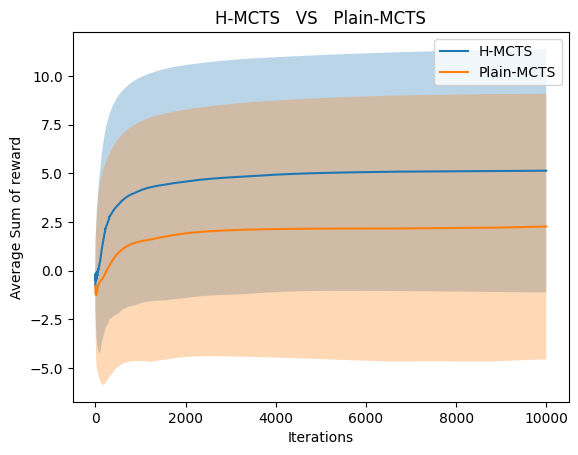

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate two random DataFrames with 50 rows and 10000 columns
df1 = pd.DataFrame(total_H)
df2 = pd.DataFrame(total_plain)

# Calculate the average separately for each column
average_df1 = df1.mean(axis=0)
average_df2 = df2.mean(axis=0)

# Calculate the standard deviation separately for each column
std_dev_df1 = df1.std(axis=0)
std_dev_df2 = df2.std(axis=0)

# Plot the averages as line charts
plt.plot(range(10000), average_df1, label='H-MCTS')
plt.plot(range(10000), average_df2, label='Plain-MCTS')

# Show the deviation as shaded regions
plt.fill_between(range(10000), average_df1 - std_dev_df1, average_df1 + std_dev_df1, alpha=0.3)
plt.fill_between(range(10000), average_df2 - std_dev_df2, average_df2 + std_dev_df2, alpha=0.3)

plt.xlabel('Iterations')
plt.ylabel('Average Sum of reward')
plt.title('H-MCTS   VS   Plain-MCTS')
plt.legend()
plt.show()

